### HipHopLyrics data

In [1]:
import pandas as pd

with open("HipHopLyrics.csv", "rt") as csv_file:
    hiphop = pd.read_csv(csv_file)

print(hiphop.shape)
hiphop

(377, 9)


,id,candidate,song,artist,sentiment,theme,album_release_date,line,url
0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...
1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics
2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics
3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics
4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics
5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics
6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...
7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics
8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...
9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics


In [2]:
hiphop.describe()

,id,album_release_date
count,377.000000,377.000000
mean,189.745358,2008.458886
std,109.304323,6.737402
min,1.000000,1989.000000
25%,95.000000,2005.000000
50%,190.000000,2011.000000
75%,284.000000,2014.000000
max,378.000000,2016.000000


### HipHopLyrics appended with supplemental data

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np

def get_url_info(url):
    r = requests.get(str(url))
    soup = BeautifulSoup(r.text, "html.parser")
    page_text = soup.get_text()
    pageviews = int(page_text.split('{"name":"pageviews","values":["')[-1].split('"')[0])
    try:
        #releasedate = time.strptime(page_text.split("\nRelease Date\n")[-1].split("\n")[0], "%B %d, %Y")
        releasedate = page_text.split("\nRelease Date\n")[-1].split("\n")[0]
    except:
        releasedate = np.nan
    return pageviews, releasedate

hiphop_appended = hiphop.copy()
hiphop_appended["lyrics_views"], hiphop_appended["track_release_date"] = zip(*hiphop_appended.url.apply(get_url_info))
hiphop_appended

,id,candidate,song,artist,sentiment,theme,album_release_date,line,url,lyrics_views,track_release_date
0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...,329759,"August 28, 2007"
1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics,5847,"March 12, 2012"
2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics,133,"May 15, 2006"
3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics,2679,
4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics,816,
5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics,7748,"August 28, 2012"
6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...,442,
7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics,9266,"October 10, 2005"
8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...,49313,"April 30, 2013"
9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics,785,


In [4]:
hiphop_appended.to_csv("HipHopLyrics_appended.csv")

In [6]:
import datetime
d = lambda x: pd.datetime.strptime(str(x), "%B %d, %Y") if type(x) == str else ""
hiphop_corrected = pd.read_csv("HipHopLyrics_appended.csv", parse_dates=["track_release_date"], date_parser=d)
hiphop_corrected

,Unnamed: 0,id,candidate,song,artist,sentiment,theme,album_release_date,line,url,lyrics_views,track_release_date
0,0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...,329759,2007-08-28
1,1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics,5847,2012-03-12
2,2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics,133,2006-05-15
3,3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics,2679,NaT
4,4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics,816,NaT
5,5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics,7748,2012-08-28
6,6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...,442,NaT
7,7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics,9266,2005-10-10
8,8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...,49313,2013-04-30
9,9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics,785,NaT


In [7]:
hiphop_corrected["lyrics_views"].describe()

count    3.770000e+02
mean     3.753353e+04
std      1.341785e+05
min      9.200000e+01
25%      7.100000e+02
50%      3.623000e+03
75%      1.492600e+04
max      1.307782e+06
Name: lyrics_views, dtype: float64

In [8]:
hiphop_corrected["track_release_date"].describe()

count                     248
unique                    233
top       2016-06-01 00:00:00
freq                        3
first     1989-07-25 00:00:00
last      2016-08-06 00:00:00
Name: track_release_date, dtype: object

### HipHopLyrics corrected release dates

In [10]:
def is_correct(row):
    if str(row["track_release_date"]) != "NaT":
        return row["album_release_date"] == row["track_release_date"].year
    else:
        return np.nan

def correct_year(row):
    if str(row["track_release_date"]) != "NaT":
        return row["track_release_date"].year
    else:
        return row["album_release_date"]
    
hiphop_corrected["years_match"] = hiphop_corrected.apply(is_correct, axis=1)
hiphop_corrected["corrected_release_year"] = hiphop_corrected.apply(correct_year, axis=1)
hiphop_corrected

,Unnamed: 0,id,candidate,song,artist,sentiment,theme,album_release_date,line,url,lyrics_views,track_release_date,years_match,corrected_release_year
0,0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...,329759,2007-08-28,False,2007
1,1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics,5847,2012-03-12,True,2012
2,2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics,133,2006-05-15,True,2006
3,3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics,2679,NaT,NaN,2006
4,4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics,816,NaT,NaN,2007
5,5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics,7748,2012-08-28,True,2012
6,6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...,442,NaT,NaN,2001
7,7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics,9266,2005-10-10,True,2005
8,8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...,49313,2013-04-30,True,2013
9,9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics,785,NaT,NaN,2005


In [19]:
hiphop_discrepant_years = hiphop_corrected[hiphop_corrected["years_match"] == False]
print(hiphop_discrepant_years.shape)
hiphop_discrepant_years[["song", "artist", "album_release_date", "track_release_date", "years_match", "corrected_release_year"]]

(18, 14)


,song,artist,album_release_date,track_release_date,years_match,corrected_release_year
0,None Shall Pass,Aesop Rock,2011,2007-08-28,False,2007
22,We Can Get It On,Yo Gotti,2012,2010-12-11,False,2010
23,Where They Do That At,Yo Gotti,2015,2010-07-28,False,2010
32,Again (Stankonia Remix),Big Boi,2001,2000-09-14,False,2000
52,Every Girl,Gudda Gudda,2010,2009-04-06,False,2009
53,Bad Bad Bad,Gucci Mane,2010,2009-12-08,False,2009
61,"Bitch, Don't Kill My Vibe (Remix)",Jay Z,2012,2013-03-19,False,2013
82,Krazy,Pitbull,2009,2008-09-30,False,2008
95,Back Together,Nicki Minaj,2015,2016-08-06,False,2016
128,Ba Bump,Black Eyed Peas,2006,2005-05-25,False,2005


### HipHopLyrics include split line data

In [20]:
def split_lyrics(lyrics):
    return lyrics.replace(",","").split(" ")

hiphop_corrected["split_lyrics"] = hiphop_corrected.line.apply(split_lyrics)
hiphop_corrected

,Unnamed: 0,id,candidate,song,artist,sentiment,theme,album_release_date,line,url,lyrics_views,track_release_date,years_match,corrected_release_year,split_lyrics
0,0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...,329759,2007-08-28,False,2007,"[Wither, by, the, watering, hole, Border, patr..."
1,1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics,5847,2012-03-12,True,2012,"[Might, find, the, door, but, never, touch, th..."
2,2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics,133,2006-05-15,True,2006,"[I, heard, Jeb, Bush, looking, for, a, (inaudi..."
3,3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics,2679,NaT,NaN,2006,"[What, you, heard, before, ain't, as, big, of,..."
4,4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics,816,NaT,NaN,2007,"[I'm, comin, back, from, Florida, /, Wit, Jeb,..."
5,5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics,7748,2012-08-28,True,2012,"[The, Rockefeller's, and, the, Bush, family, i..."
6,6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...,442,NaT,NaN,2001,"[When, Jeb, Bush, pushing, life, /, If, I, tou..."
7,7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics,9266,2005-10-10,True,2005,"[Way, to, go, Jeb, really, great, strategy]"
8,8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...,49313,2013-04-30,True,2013,"[Obama, nation, the, Bushes, the, Clintons, or..."
9,9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics,785,NaT,NaN,2005,"[Bobby, got, Bush, like, George, and, Jeb]"


In [22]:
del hiphop_corrected["Unnamed: 0"]
hiphop_corrected

,id,candidate,song,artist,sentiment,theme,album_release_date,line,url,lyrics_views,track_release_date,years_match,corrected_release_year,split_lyrics
0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...,329759,2007-08-28,False,2007,"[Wither, by, the, watering, hole, Border, patr..."
1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics,5847,2012-03-12,True,2012,"[Might, find, the, door, but, never, touch, th..."
2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics,133,2006-05-15,True,2006,"[I, heard, Jeb, Bush, looking, for, a, (inaudi..."
3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics,2679,NaT,NaN,2006,"[What, you, heard, before, ain't, as, big, of,..."
4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics,816,NaT,NaN,2007,"[I'm, comin, back, from, Florida, /, Wit, Jeb,..."
5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics,7748,2012-08-28,True,2012,"[The, Rockefeller's, and, the, Bush, family, i..."
6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...,442,NaT,NaN,2001,"[When, Jeb, Bush, pushing, life, /, If, I, tou..."
7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics,9266,2005-10-10,True,2005,"[Way, to, go, Jeb, really, great, strategy]"
8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...,49313,2013-04-30,True,2013,"[Obama, nation, the, Bushes, the, Clintons, or..."
9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics,785,NaT,NaN,2005,"[Bobby, got, Bush, like, George, and, Jeb]"


In [23]:
hiphop_corrected.to_csv("HipHopLyrics_corrected.csv")

### What events lead to song lyric mentions?

In [27]:
all_years = hiphop_corrected["corrected_release_year"].values
min_year = min(all_years)
max_year = max(all_years)
min_year, max_year

(1989, 2016)

In [29]:
candidates = sorted(set(hiphop_corrected["candidate"]))

In [30]:
years = {key: {year: 0 for year in range(min_year, max_year+1)} for key in candidates}

for i in range(hiphop_corrected.shape[0]):
    year = hiphop_corrected.iloc[i]["corrected_release_year"]
    years[hiphop_corrected.iloc[i]["candidate"]][year] += 1

years_df = pd.DataFrame.from_dict(years)
years_df

,Ben Carson,Bernie Sanders,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,Mike Huckabee,Ted Cruz
1989,0,0,0,3,0,0,0,0
1990,0,0,0,2,0,0,0,0
1991,0,0,0,2,0,0,0,0
1992,0,0,0,4,0,0,0,0
1993,0,0,0,1,2,0,0,0
1994,0,0,0,3,2,0,0,0
1995,0,0,0,4,0,0,0,0
1996,0,0,0,3,2,0,0,0
1997,0,0,0,2,2,0,0,0
1998,0,0,0,7,2,0,0,0


Text(0,0.5,'Number of Song References')

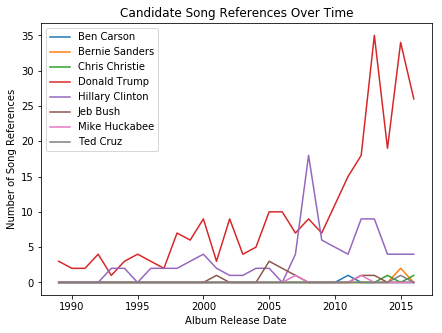

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

plt = years_df.plot(title="Candidate Song References Over Time", figsize=(7, 5))
plt.set_xlabel("Album Release Date")
plt.set_ylabel("Number of Song References")

### Most frequent words in referenced line of lyrics

In [39]:
import string

def word_freq(cand_group):
    cand_lyrics = []
    for x in cand_group["split_lyrics"]:
        cand_lyrics += x
    
    freq_dict = {}
    char = string.ascii_letters + string.digits
    for word in cand_lyrics:
        if len(word) > 1:
            if word[0] not in char:
                word = word[1:]
            if word[-1] not in char:
                word = word[:-1]
        if word == "/":
            pass
        elif freq_dict.get(word.lower(), None) == None:
            freq_dict[word.lower()] = 1
        else:
            freq_dict[word.lower()] += 1
    return freq_dict

cand = hiphop_corrected.groupby("candidate")

In [41]:
trump = cand.get_group("Donald Trump")
trump_lyrics_freq = pd.Series(word_freq(trump)).sort_values(ascending=False)
print(trump_lyrics_freq.sum())

trump_lyrics_freq_df = pd.DataFrame(trump_lyrics_freq, columns=["word_count"])
trump_lyrics_freq_df["word_frequency"] = trump_lyrics_freq_df["word_count"]/trump_lyrics_freq.sum()
trump_lyrics_freq_df.head(40)

2678


,word_count,word_frequency
trump,274,0.102315
donald,143,0.053398
the,129,0.048170
i,63,0.023525
like,61,0.022778
i'm,56,0.020911
a,55,0.020538
in,51,0.019044
and,51,0.019044
to,34,0.012696


In [42]:
clinton = cand.get_group("Hillary Clinton")
clinton_lyrics_freq = pd.Series(word_freq(clinton)).sort_values(ascending=False)
print(clinton_lyrics_freq.sum())

clinton_lyrics_freq_df = pd.DataFrame(clinton_lyrics_freq, columns=["word_count"])
clinton_lyrics_freq_df["word_frequency"] = clinton_lyrics_freq_df["word_count"]/clinton_lyrics_freq.sum()
clinton_lyrics_freq_df.head(40)

1076


,word_count,word_frequency
hillary,73,0.067844
clinton,35,0.032528
and,30,0.027881
like,29,0.026952
the,28,0.026022
bill,24,0.022305
i,23,0.021375
you,18,0.016729
to,18,0.016729
a,18,0.016729


In [44]:
#not used in report

def word_freq_by_year(cand_group):
    cand_lyrics = []
    for x in cand_group["split_lyrics"]:
        cand_lyrics += x
    
    freq_dict = {}
    char = string.ascii_letters + string.digits
    for word in cand_lyrics:
        if len(word) > 1:
            if word[0] not in char:
                word = word[1:]
            if word[-1] not in char:
                word = word[:-1]
        if word == "/":
            pass
        elif freq_dict.get(word.lower(), None) == None:
            freq_dict[word.lower()] = 1
        else:
            freq_dict[word.lower()] += 1
    return pd.Series(freq_dict).sort_values(ascending=False).head(10)

trump = cand.get_group("Donald Trump")
trump_years = trump.groupby("corrected_release_year")
trump_lyrics_freq = trump_years.apply(word_freq_by_year)
trump_lyrics_freq

corrected_release_year         
1989                    donald      6
                        trump       4
                        and         3
                        y'all       1
                        like        1
                        bout        1
                        boy         1
                        crazy       1
                        got         1
                        hung        1
1990                    trump       2
                        donald      2
                        than        1
                        rich        1
                        not         1
                        more        1
                        makin       1
                        like        1
                        i'm         1
                        he          1
1991                    trump       2
                        like        2
                        stackin     1
                        rollin      1
                        paper       1
                  

### Are some politicians viewed more positively or negatively than others?

In [46]:
sentiments = {key: {"positive": 0, "neutral": 0, "negative": 0} for key in candidates}

for i in range(hiphop.shape[0]):
    sentiment = hiphop.iloc[i]["sentiment"]
    sentiments[hiphop.iloc[i]["candidate"]][sentiment] += 1

print(sentiments)

{'Ben Carson': {'positive': 1, 'neutral': 0, 'negative': 0}, 'Bernie Sanders': {'positive': 1, 'neutral': 0, 'negative': 1}, 'Chris Christie': {'positive': 0, 'neutral': 2, 'negative': 0}, 'Donald Trump': {'positive': 160, 'neutral': 74, 'negative': 34}, 'Hillary Clinton': {'positive': 16, 'neutral': 47, 'negative': 29}, 'Jeb Bush': {'positive': 0, 'neutral': 4, 'negative': 5}, 'Mike Huckabee': {'positive': 0, 'neutral': 1, 'negative': 1}, 'Ted Cruz': {'positive': 0, 'neutral': 0, 'negative': 1}}


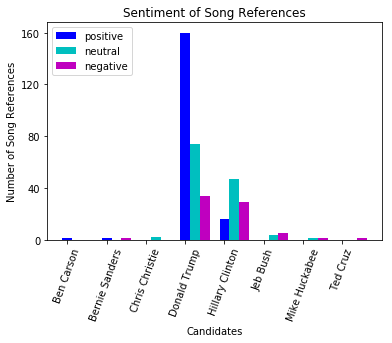

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

positive = [sentiments[candidate]["positive"] for candidate in candidates]
neutral = [sentiments[candidate]["neutral"] for candidate in candidates]
negative = [sentiments[candidate]["negative"] for candidate in candidates]
pos_bottom = [neutral[i]+negative[i] for i in range(len(neutral))]

ind = np.arange(len(candidates))
width = 0.25

p1 = plt.bar(ind, positive, width, color="b")
p2 = plt.bar(ind+width, neutral, width, color="c")
p3 = plt.bar(ind+2*width, negative, width, color="m")

plt.title("Sentiment of Song References")
plt.ylabel("Number of Song References")
plt.xlabel("Candidates")
plt.xticks(ind, tuple(candidates), rotation=70)
plt.yticks(np.arange(0, 200, 40))
plt.legend((p1[0], p2[0], p3[0]), ("positive", "neutral", "negative"), loc=2)

plt.show()

In [54]:
cand_sent_groups = hiphop_corrected.groupby(["candidate", "sentiment"])

lyrics_views = pd.DataFrame(cand_sent_groups.lyrics_views.sum()).reset_index()
lyrics_views

,candidate,sentiment,lyrics_views
0,Ben Carson,positive,953
1,Bernie Sanders,negative,1390
2,Bernie Sanders,positive,27445
3,Chris Christie,neutral,5770
4,Donald Trump,negative,2620483
5,Donald Trump,neutral,2075008
6,Donald Trump,positive,6159888
7,Hillary Clinton,negative,652880
8,Hillary Clinton,neutral,2001261
9,Hillary Clinton,positive,196953


In [58]:
lyrics_views_dict = {"positive": {}, "negative": {}, "neutral": {}}

for i in range(len(lyrics_views)):
    row = lyrics_views.loc[i]
    lyrics_views_dict[row["sentiment"]][row["candidate"]] = row["lyrics_views"]

lyrics_views_transform = pd.DataFrame(lyrics_views_dict)
lyrics_views_transform

,negative,neutral,positive
Ben Carson,NaN,NaN,953.0
Bernie Sanders,1390.0,NaN,27445.0
Chris Christie,NaN,5770.0,NaN
Donald Trump,2620483.0,2075008.0,6159888.0
Hillary Clinton,652880.0,2001261.0,196953.0
Jeb Bush,69822.0,1647.0,NaN
Mike Huckabee,5847.0,329759.0,NaN
Ted Cruz,1034.0,NaN,NaN


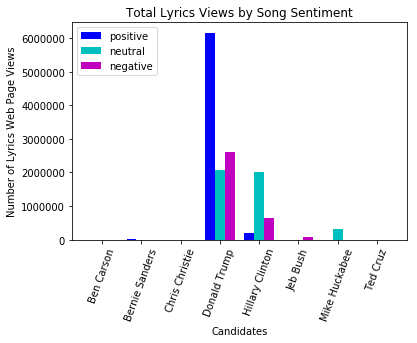

In [59]:
fig, ax = plt.subplots()
ind = np.arange(8)
width = 0.25
p1 = ax.bar(ind, lyrics_views_transform["positive"], width, color="b")
p2 = ax.bar(ind+width, lyrics_views_transform["neutral"], width, color="c")
p3 = ax.bar(ind+2*width, lyrics_views_transform["negative"], width, color="m")
ax.set_title("Total Lyrics Views by Song Sentiment")
ax.set_xticks(ind + width)
ax.set_xticklabels(lyrics_views_transform.index, rotation=70)
ax.set_ylabel("Number of Lyrics Web Page Views")
ax.set_xlabel("Candidates")
plt.legend((p1[0], p2[0], p3[0]), ("positive", "neutral", "negative"), loc=2)
plt.show()

In [61]:
lyrics_views_avg = pd.DataFrame(cand_sent_groups.lyrics_views.sum()/cand_sent_groups.lyrics_views.count()).reset_index()

lyrics_views_avg_dict = {"positive": {}, "negative": {}, "neutral": {}}

for i in range(len(lyrics_views_avg)):
    row = lyrics_views_avg.loc[i]
    lyrics_views_avg_dict[row["sentiment"]][row["candidate"]] = row["lyrics_views"]

lyrics_views_avg_transform = pd.DataFrame(lyrics_views_avg_dict)
lyrics_views_avg_transform

,negative,neutral,positive
Ben Carson,NaN,NaN,953.0000
Bernie Sanders,1390.000000,NaN,27445.0000
Chris Christie,NaN,2885.000000,NaN
Donald Trump,77073.029412,28040.648649,38499.3000
Hillary Clinton,22513.103448,42580.021277,12309.5625
Jeb Bush,13964.400000,411.750000,NaN
Mike Huckabee,5847.000000,329759.000000,NaN
Ted Cruz,1034.000000,NaN,NaN


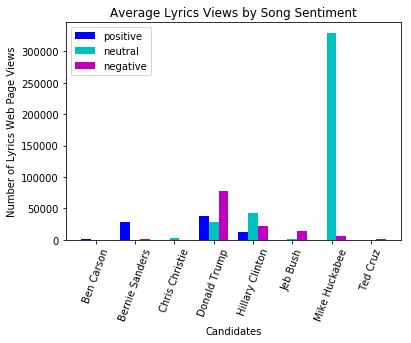

In [62]:
fig, ax = plt.subplots()
ind = np.arange(8)
width = 0.25
p1 = ax.bar(ind, lyrics_views_avg_transform["positive"], width, color="b")
p2 = ax.bar(ind+width, lyrics_views_avg_transform["neutral"], width, color="c")
p3 = ax.bar(ind+2*width, lyrics_views_avg_transform["negative"], width, color="m")
ax.set_title("Average Lyrics Views by Song Sentiment")
ax.set_xticks(ind + width)
ax.set_xticklabels(lyrics_views_avg_transform.index, rotation=70)
ax.set_ylabel("Number of Lyrics Web Page Views")
ax.set_xlabel("Candidates")
plt.legend((p1[0], p2[0], p3[0]), ("positive", "neutral", "negative"), loc=2)
plt.show()